In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick

# Import Data & Sample

In [4]:
# 1. Veriyi oku
df = pd.read_csv(
    'C:/Users/facikgoz/Desktop/Borusan Eğitim/used_cars_data.csv',
    parse_dates=['listed_date']
)

C:\Users\facikgoz\AppData\Local\Temp\ipykernel_28948\2176917866.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [5]:
# 2. Gerekli sütunları seç ve isimleri sadeleştir
df = df[['price', 'daysonmarket']].copy()
df = df.rename(columns={'price': 'Price', 'daysonmarket': 'DaysOnMarket'})

In [6]:
# 3. Temizlik: Eksik ve mantıksız verileri çıkar
df = df.dropna()
df = df[(df['Price'] > 0) & (df['DaysOnMarket'] > 0)]

In [7]:
# 4. Temel regresyon modeli (DaysOnMarket ~ Price)
X = df[['Price']]
y = df['DaysOnMarket']
 
model = LinearRegression()
model.fit(X, y)
 
print("Regresyon Katsayısı (Price):", model.coef_[0])
print("Regresyon Sabiti:", model.intercept_)
print(f"R^2 Skoru: {model.score(X, y):.3f}")
 

Regresyon Katsayısı (Price): 0.00036151121765919044
Regresyon Sabiti: 66.59444313174872
R^2 Skoru: 0.004


In [8]:

# 5. Simülasyon: Fiyatı %5, %10, %15 düşürürsek satış süresi nasıl değişir?
mean_price = df['Price'].mean()
sim_prices = [int(mean_price), int(mean_price*0.95), int(mean_price*0.90), int(mean_price*0.85)]
sim_labels = ['Mevcut', '%5 Düşüş', '%10 Düşüş', '%15 Düşüş']
 
sim_days = model.predict(np.array(sim_prices).reshape(-1, 1))
 
print("\nSimülasyon Sonuçları:")
for label, price, days in zip(sim_labels, sim_prices, sim_days):
  print(f"{label}: Fiyat = {price:,} TL, Tahmini Satış Süresi = {days:.1f} gün")


Simülasyon Sonuçları:
Mevcut: Fiyat = 29,915 TL, Tahmini Satış Süresi = 77.4 gün
%5 Düşüş: Fiyat = 28,419 TL, Tahmini Satış Süresi = 76.9 gün
%10 Düşüş: Fiyat = 26,923 TL, Tahmini Satış Süresi = 76.3 gün
%15 Düşüş: Fiyat = 25,427 TL, Tahmini Satış Süresi = 75.8 gün


c:\Users\facikgoz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\facikgoz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\facikgoz\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


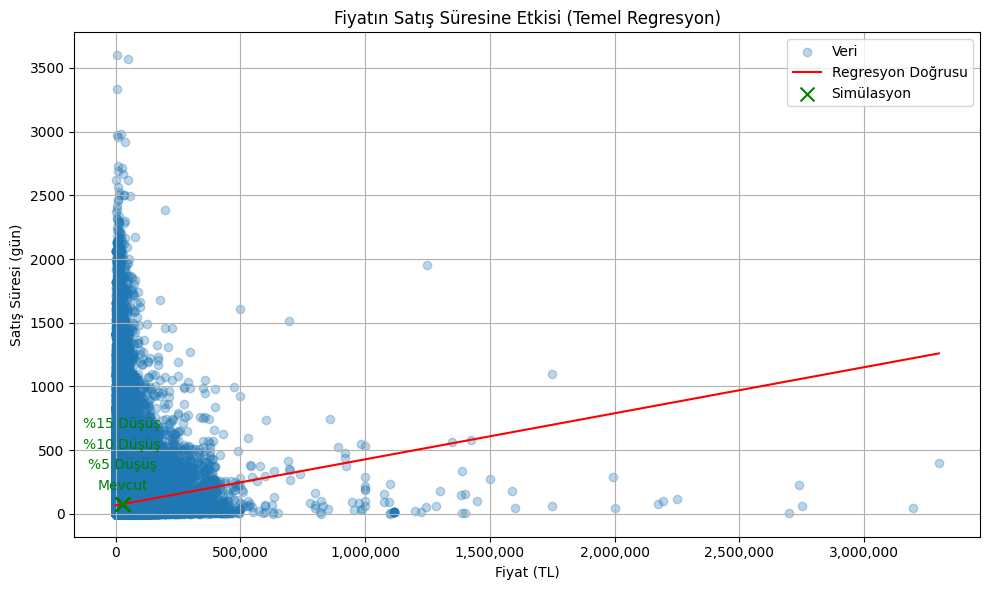

In [9]:
# 6. Görselleştirme
plt.figure(figsize=(10,6))
# Veri noktaları
plt.scatter(df['Price'], df['DaysOnMarket'], alpha=0.3, label='Veri', zorder=1)
# Regresyon doğrusu için sıralı çizim
sort_idx = np.argsort(df['Price'].values)
x_sorted = df['Price'].values[sort_idx].reshape(-1, 1)
y_line = model.predict(x_sorted)
plt.plot(x_sorted, y_line, color='red', label='Regresyon Doğrusu', zorder=2)
# Simülasyon noktaları
plt.scatter(sim_prices, sim_days, color='green', s=100, marker='x', label='Simülasyon', zorder=3)
# Anotasyonları üst üste binmeyecek ofsetlerle yerleştir
offsets = [(0,10), (0,25), (0,40), (0,55)]
for i, txt in enumerate(sim_labels):
  plt.annotate(txt, (sim_prices[i], sim_days[i]), textcoords="offset points", xytext=offsets[i], ha='center', color='green')
 
plt.xlabel('Fiyat (TL)')
plt.ylabel('Satış Süresi (gün)')
plt.title('Fiyatın Satış Süresine Etkisi (Temel Regresyon)')
plt.legend()
plt.grid(True)
# Eksen formatları: binlik ayraç ve tam sayılar
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{int(x):,}"))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: f"{int(y)}"))
plt.tight_layout()
plt.show()

Fiyat Değişimi

R^2: 0.004
Katsayı(Price): 0.0004
Sabit: 66.59

Simülasyon:
%0  -> Fiyat: $29,915  Tahmini Gün: 77.4
%5  -> Fiyat: $28,419  Tahmini Gün: 76.9
%10  -> Fiyat: $26,923  Tahmini Gün: 76.3
%15  -> Fiyat: $25,427  Tahmini Gün: 75.8


c:\Users\facikgoz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


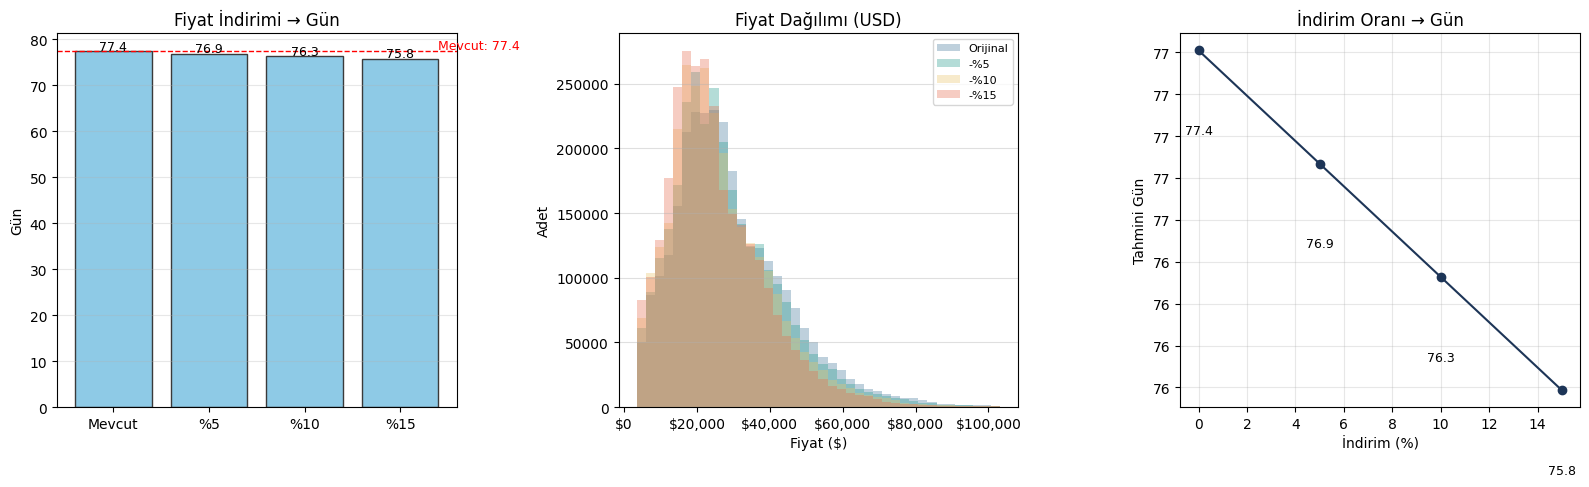

In [10]:
df = df.dropna()
df = df[(df['Price'] > 0) & (df['DaysOnMarket'] > 0)]
 
# Basit doğrusal regresyon (DaysOnMarket ~ Price)
X = df[['Price']]
y = df['DaysOnMarket']
model = LinearRegression().fit(X, y)
 
r2 = model.score(X, y)
print(f"R^2: {r2:.3f}")
print(f"Katsayı(Price): {model.coef_[0]:.4f}")
print(f"Sabit: {model.intercept_:.2f}")
 
# Simülasyon: 0, 5, 10, 15 indirim
reductions = [0, 5, 10, 15]
base_price = float(df['Price'].mean())
sim_prices = [int(base_price * (1 - r/100)) for r in reductions]
sim_days = model.predict(np.array(sim_prices).reshape(-1, 1))
 
print("\nSimülasyon:")
for r, p, d in zip(reductions, sim_prices, sim_days):
  print(f"%{r}  -> Fiyat: ${p:,}  Tahmini Gün: {d:.1f}")
 
# Görseller: 3 panel
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
 
# Panel 1: Bar (İndirim -> Gün)
ax1 = axes[0]
labels = ["Mevcut", "%5", "%10", "%15"]
ax1.bar(labels, sim_days, color="#8ecae6", edgecolor="#3a3a3a")
for i, v in enumerate(sim_days):
  ax1.text(i, v + 0.3, f"{v:.1f}", ha="center", fontsize=9)
# Referans çizgi + etiketi sağ üstte göster
ax1.axhline(sim_days[0], ls="--", color="red", lw=1)
ax1.text(len(labels)-0.6, sim_days[0] + 0.4, f"Mevcut: {sim_days[0]:.1f}", color="red", fontsize=9)
ax1.set_title("Fiyat İndirimi → Gün")
ax1.set_ylabel("Gün")
ax1.grid(axis="y", alpha=0.3)
 
# Panel 2: Histogram (Fiyat dağılımı ve indirimli)
ax2 = axes[1]
# Ortak bin aralığı: uzun kuyruğu kırpmak için 0.5-99.5 persentil
low = float(np.percentile(df['Price'], 0.5))
high = float(np.percentile(df['Price'], 99.5))
bins = 40
hist_kwargs = dict(bins=bins, range=(low, high), alpha=0.35, edgecolor=None)
ax2.hist(df['Price'], color="#457b9d", label="Orijinal", **hist_kwargs)
ax2.hist(df['Price'] * 0.95, color="#2a9d8f", label="-%5", **hist_kwargs)
ax2.hist(df['Price'] * 0.90, color="#e9c46a", label="-%10", **hist_kwargs)
ax2.hist(df['Price'] * 0.85, color="#e76f51", label="-%15", **hist_kwargs)
ax2.set_title("Fiyat Dağılımı (USD)")
ax2.set_xlabel("Fiyat ($)")
ax2.set_ylabel("Adet")
ax2.legend(fontsize=8)
ax2.xaxis.set_major_formatter(StrMethodFormatter("${x:,.0f}"))
ax2.grid(axis="y", alpha=0.4)
 
# Panel 3: Line (İndirim % -> Gün)
ax3 = axes[2]
ax3.plot(reductions, sim_days, marker="o", color="#1d3557")
for x, yv in zip(reductions, sim_days):
  ax3.text(x, yv - 0.4, f"{yv:.1f}", ha="center", fontsize=9)
ax3.set_title("İndirim Oranı → Gün")
ax3.set_xlabel("İndirim (%)")
ax3.set_ylabel("Tahmini Gün")
ax3.grid(True, alpha=0.3)
 
# Eksen biçimleri
axes[0].yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
axes[2].yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
 
fig.tight_layout()
plt.show()